# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [2]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

## Global COVID-19 Analysis

In [3]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/9/20


,7/9/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,3117946,133290,4.27
Brazil,1755779,69184,3.94
United Kingdom,289154,44687,15.45
Italy,242363,34926,14.41
Mexico,282283,33526,11.88
France,207356,29982,14.46
Spain,253056,28401,11.22


## COVID-19 Country-by-Country Format for Further Analysis

In [4]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/9/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
29407,US,2996098,2020-07-07,131480.0,1195.0,60021.0,51383.428571
29406,US,2936077,2020-07-06,130285.0,325.0,44953.0,49344.142857
29405,US,2891124,2020-07-05,129960.0,271.0,49883.0,48832.857143
29404,US,2841241,2020-07-04,129689.0,247.0,45880.0,47283.142857
29403,US,2795361,2020-07-03,129442.0,639.0,53312.0,46829.571429
29402,US,2742049,2020-07-02,128803.0,698.0,54461.0,45678.571429
29401,US,2687588,2020-07-01,128105.0,673.0,51174.0,43594.571429


## US State-by-State COVID-19 Analysis

In [5]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/9/20


,7/9/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,399513,32283.0,8.08
New Jersey,174270,15448.0,8.86
Massachusetts,110897,8268.0,7.46
Illinois,151572,7329.0,4.84
California,302484,6859.0,2.27
Pennsylvania,97542,6848.0,7.02
Michigan,75063,6271.0,8.35


## COVID-19 State-by-State Format for Further Analysis

In [6]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/9/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1017,California,284012,2020-07-07,6573.0,132.0,12977.0,7513.428571
1016,California,271035,2020-07-06,6441.0,68.0,6354.0,6769.857143
1015,California,264681,2020-07-05,6373.0,39.0,11786.0,7027.714286
1014,California,252895,2020-07-04,6334.0,19.0,2381.0,6029.000000
1013,California,250514,2020-07-03,6315.0,50.0,3964.0,6238.571429
1012,California,246550,2020-07-02,6265.0,96.0,7869.0,6491.142857
1011,California,238681,2020-07-01,6169.0,87.0,7263.0,6093.857143


## County-by-County COVID-19 Analysis 

In [7]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/9/20


,7/9/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,124992,3690.0,2.95
Riverside,23334,533.0,2.28
San Diego,18402,415.0,2.26
Orange,21517,402.0,1.87
San Bernardino,17414,304.0,1.75
Santa Clara,5678,166.0,2.92
Tulare,5509,148.0,2.69


## COVID-19 County-by-County Format for Further Analysis

In [8]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/9/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3227,Los Angeles,120764,2020-07-07,3582.0,48.0,4194.0,2416.285714
3226,Los Angeles,116570,2020-07-06,3534.0,47.0,1546.0,2230.285714
3225,Los Angeles,115024,2020-07-05,3487.0,30.0,7198.0,2443.714286
3224,Los Angeles,107826,2020-07-04,3457.0,0.0,20.0,1777.285714
3223,Los Angeles,107806,2020-07-03,3457.0,0.0,14.0,2059.285714
3222,Los Angeles,107792,2020-07-02,3457.0,52.0,2127.0,2316.428571
3221,Los Angeles,105665,2020-07-01,3405.0,34.0,1815.0,2290.285714
3220,Los Angeles,103850,2020-06-30,3371.0,40.0,2892.0,2191.142857
3219,Los Angeles,100958,2020-06-29,3331.0,26.0,3040.0,2134.428571
3218,Los Angeles,97918,2020-06-28,3305.0,20.0,2533.0,2072.000000



7 day new US cases as of 7/9/20


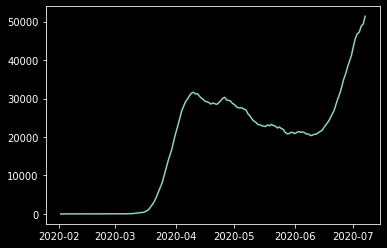

In [9]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/9/20


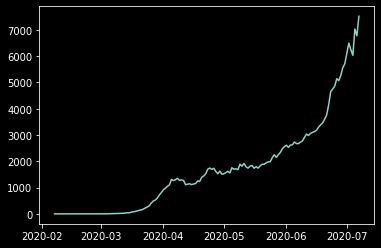

In [10]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/9/20


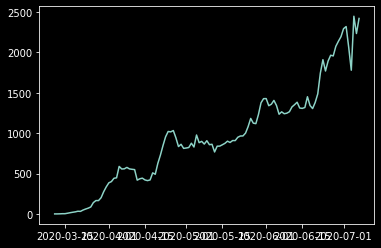

In [11]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()